<a href="https://colab.research.google.com/github/Karla-Flores/Arrests-Predictor/blob/main/Model_Arrest/Chicago_Crime_nn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **Preprocessing**

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.linear_model import SGDClassifier
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from google.colab import files
uploaded = files.upload()

Saving chicago_crime_db.csv to chicago_crime_db.csv


In [3]:
# Uploading ETL file
data = pd.read_csv('chicago_crime_db.csv')
data.head(5)

,Primary Type,Arrest,Domestic,Latitude,Longitude,Location Description,HOUR,SEASON
0,BATTERY,False,True,41.815117,-87.670000,RESIDENCE,Afternoon,Autumn
1,THEFT,False,False,41.895080,-87.765400,CTA,Morning,Autumn
2,NARCOTICS,True,False,41.937406,-87.716650,PUBLIC OPEN SPACE,Afternoon,Autumn
3,ASSAULT,False,True,41.881903,-87.755121,RESIDENCE,Afternoon,Autumn
4,BURGLARY,False,False,41.744379,-87.658431,RESIDENCE,Morning,Autumn


In [4]:
data.shape

(6691918, 8)

In [5]:
# Return a random sample of items from an axis of object
sample_data = data.sample(frac=0.05, random_state=1)
sample_data.shape

(334596, 8)

In [6]:
# Convert categorical data to numeric with `pd.get_dummies`
data_dummies = pd.get_dummies(sample_data, columns = ['Location Description', 'Primary Type', 'HOUR', 'SEASON'],dtype=float)
data_dummies.head()

,Arrest,Domestic,Latitude,Longitude,Location Description_AIRPORT,Location Description_CHURCH,Location Description_COMMERCIAL BUILDING,Location Description_CTA,Location Description_EDUCATIONAL BUILDING,Location Description_FEDERAL PROPERTY,Location Description_HOSPITAL,Location Description_HOTEL,Location Description_OTHER,Location Description_PUBLIC ENTERTAINMENT,Location Description_PUBLIC OPEN SPACE,Location Description_RESIDENCE,Location Description_VEHICLE,Primary Type_ARSON,Primary Type_ASSAULT,Primary Type_BATTERY,Primary Type_BURGLARY,Primary Type_CRIM SEXUAL ASSAULT,Primary Type_CRIMINAL DAMAGE,Primary Type_CRIMINAL SEXUAL ASSAULT,Primary Type_CRIMINAL TRESPASS,Primary Type_DECEPTIVE PRACTICE,Primary Type_GAMBLING,Primary Type_HOMICIDE,Primary Type_INTERFERENCE WITH PUBLIC OFFICER,Primary Type_INTIMIDATION,Primary Type_KIDNAPPING,Primary Type_LIQUOR LAW VIOLATION,Primary Type_MOTOR VEHICLE THEFT,Primary Type_NARCOTICS,Primary Type_OFFENSE INVOLVING CHILDREN,Primary Type_OTHER,Primary Type_OTHER OFFENSE,Primary Type_PROSTITUTION,Primary Type_PUBLIC PEACE VIOLATION,Primary Type_ROBBERY,Primary Type_SEX OFFENSE,Primary Type_STALKING,Primary Type_THEFT,Primary Type_WEAPONS VIOLATION,HOUR_Afternoon,HOUR_Evening,HOUR_Morning,HOUR_Night,SEASON_Autumn,SEASON_Spring,SEASON_Summer,SEASON_Winter
4595971,True,False,41.808918,-87.604362,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3944072,False,False,41.890977,-87.711301,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1928585,False,False,41.806480,-87.752906,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
754949,False,False,41.868173,-87.632289,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2246397,False,False,41.829515,-87.667932,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


In [7]:
# Split our preprocessed data into our features and target arrays
y = data_dummies.Arrest
X = data_dummies.drop('Arrest', axis=1)

In [8]:
y.unique()

array([ True, False])

In [9]:
len(X.columns)

51

In [10]:
# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state= 42)

In [11]:
# Standardizing dataset so columns that contain larger values do not unduly influence the outcome
scaler = StandardScaler().fit(X)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Neural Networks

In [12]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.


nn = tf.keras.models.Sequential()

# # First hidden layer
nn.add(tf.keras.layers.Dense(units=110, activation="relu", input_dim=51))

# # Second hidden layer
nn.add(tf.keras.layers.Dense(units=55, activation="relu"))

# # Third hidden layer
nn.add(tf.keras.layers.Dense(units=110, activation="relu"))

# # Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# # Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 110)               5720      
_________________________________________________________________
dense_1 (Dense)              (None, 55)                6105      
_________________________________________________________________
dense_2 (Dense)              (None, 110)               6160      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 111       
Total params: 18,096
Trainable params: 18,096
Non-trainable params: 0
_________________________________________________________________


In [13]:
# Compile the model
nn.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics=['accuracy', tf.keras.metrics.Recall()])

In [14]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,validation_split=0.15, epochs=100)

Epoch 1/100
6666/6666 [==============================] - 19s 3ms/step - loss: 0.3377 - accuracy: 0.8678 - recall: 0.5662 - val_loss: 0.3307 - val_accuracy: 0.8699 - val_recall: 0.5808
Epoch 2/100
6666/6666 [==============================] - 19s 3ms/step - loss: 0.3310 - accuracy: 0.8699 - recall: 0.5725 - val_loss: 0.3291 - val_accuracy: 0.8696 - val_recall: 0.5639
Epoch 3/100
6666/6666 [==============================] - 18s 3ms/step - loss: 0.3298 - accuracy: 0.8702 - recall: 0.5715 - val_loss: 0.3305 - val_accuracy: 0.8695 - val_recall: 0.5753
Epoch 4/100
6666/6666 [==============================] - 18s 3ms/step - loss: 0.3289 - accuracy: 0.8705 - recall: 0.5720 - val_loss: 0.3289 - val_accuracy: 0.8700 - val_recall: 0.5678
Epoch 5/100
6666/6666 [==============================] - 18s 3ms/step - loss: 0.3284 - accuracy: 0.8702 - recall: 0.5706 - val_loss: 0.3288 - val_accuracy: 0.8702 - val_recall: 0.5730
Epoch 6/100
6666/6666 [==============================] - 18s 3ms/step - loss: 0.

In [15]:
# Evaluate the model using the training data 
model_loss, model_accuracy, model_Recall = nn.evaluate(X_test_scaled, y_test, verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

2615/2615 - 3s - loss: 0.3476 - accuracy: 0.8686 - recall: 0.5997
Loss: 0.34764552116394043, Accuracy: 0.8686176538467407


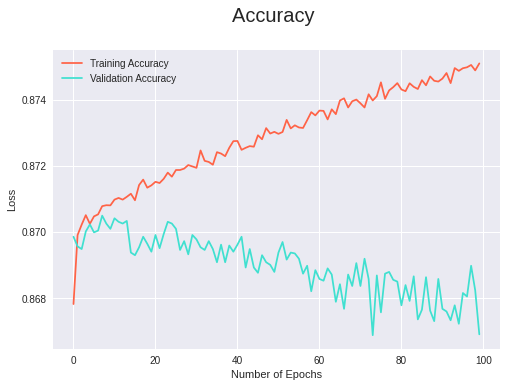

In [16]:
# Model Accuracy Graph
plt.style.use('seaborn')
plt.title('Accuracy \n',fontsize=20)
plt.plot(fit_model.history['accuracy'], 'tomato', label='Training Accuracy')
plt.plot(fit_model.history['val_accuracy'], 'turquoise',label='Validation Accuracy')
plt.xlabel('Number of Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

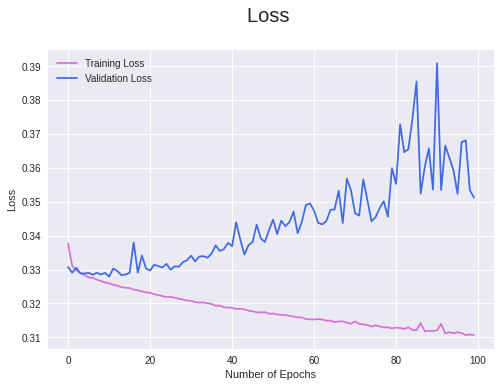

In [17]:
# Model Loss Graph
plt.style.use('seaborn')
plt.title('Loss \n',fontsize=20)
plt.plot(fit_model.history['loss'], 'orchid', label='Training Loss')
plt.plot(fit_model.history['val_loss'],'royalblue', label='Validation Loss')
plt.xlabel('Number of Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [19]:
# Export our model to HDF5 file
from google.colab import files
nn.save('../Model- sav/Chicago_Crime_NN.h5')
files.download('../Model- sav/Chicago_Crime_NN.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>